In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the number of inputs
input_size = 25

# Define the encoder
input_layer = Input(shape=(input_size,))
encoded = Dense(20, activation='relu')(input_layer)
encoded = Dense(15, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(5, activation='relu')(encoded)

# Define the decoder
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(15, activation='relu')(decoded)
decoded = Dense(20, activation='relu')(decoded)
decoded = Dense(input_size, activation='sigmoid')(decoded)

# Combine encoder and decoder to create autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Generate some random data for training
num_samples = 1000
x_train = np.random.rand(num_samples, input_size)

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=1000, batch_size=32, shuffle=True)

# Use the trained autoencoder to encode and decode data
encoded_data = autoencoder.predict(x_train)

# Check the shape of the encoded data
print("Shape of encoded data:", encoded_data.shape)





Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6934 
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6923 
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6906 
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6881 
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6864 
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6839 
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6822 
Epoch 8/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6802 
Epoch 9/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6781 
Epoch 10/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6761
Epoch 11/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6744 
Epoch 12/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6734
Epoch 13/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6727
Epoch 14/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6724 
Epoch 15/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

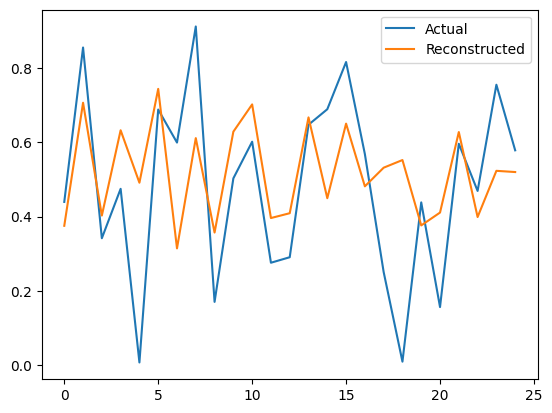

In [4]:
#plot the actual vs reconstructed data
import matplotlib.pyplot as plt
plt.plot(x_train[0], label='Actual')
plt.plot(encoded_data[0], label='Reconstructed')
plt.legend()
plt.show()